<a href="https://colab.research.google.com/github/KDM777/AI_certificate/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A52%EA%B8%89_Day3%EC%9D%98_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tree-ensemble models

In [ ]:
%cd /content/drive/MyDrive/강의자료/인공지능2급/금오공대_230802/실습용자료
!ls

/content/drive/MyDrive/강의자료/인공지능2급/금오공대_230802/실습용자료
 1군전염병발병현황_년도별_2.csv   고객정보_마스터.csv
 adult.csv			  공부시간과시험점수2.csv
 adult.data			  공부시간과시험점수3.csv
 adult.data.1			  공부시간과시험점수.csv
 adult_test.csv			  공부시간과시험합격.csv
 blob.csv			  과일2개.csv
 BostonHousing.csv		  과일3개.csv
 breast_cancer.csv		  과일채소목록_2.csv
 BTC-USD.csv			  과일채소목록.csv
 cancer.csv			  과학자들.csv
 desktop.ini			  네이버영화후기_전처리전.xlsx
 df_final.csv			  맨하탄주택가격.csv
 fish1.csv			  부품구입대장2.xls
 fish2.csv			  부품구입대장3.xls
 fish3.csv			  부품구입대장.xlsx
 fish.csv			  붓꽃정보.csv
 fish_perch3.csv		  붓꽃_최종.csv
 fish_perch.csv			  사무용비품신청내역.xlsx
 heart.jpg			  사원별판매현황_홍길동.csv
 iris.csv			  사원별판매현황_홍길동_utf8.csv
 KNN_model.pkl			  상세거래내역_1.csv
 korea.jpg			  상세거래내역_2.csv
 out_sa

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# train set / test set 분리
from sklearn.model_selection import train_test_split

# train_test_split 기본적으로 train 3 : test 1 비율로 나누어 준다.
X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    random_state = 0
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

print("train score : ", round(tree_clf.score(X_train,y_train), 3))
print("test score : ", round(tree_clf.score(X_test,y_test), 3))

train score :  1.0
test score :  0.895


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(max_depth=None)
RFC.fit(X_train,y_train)

print("훈련 데이터 점수:", round(RFC.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(RFC.score(X_test, y_test), 3))

훈련 데이터 점수: 1.0
테스트 데이터 점수: 0.965


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(max_depth=None)
GBC.fit(X_train,y_train)

print("훈련 데이터 점수:", round(GBC.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(GBC.score(X_test, y_test), 3))

훈련 데이터 점수: 1.0
테스트 데이터 점수: 0.888


In [ ]:
from xgboost import XGBClassifier

XGB = XGBClassifier(max_depth= 100, n_estimators= 100)
XGB.fit(X_train,y_train)
print("훈련 데이터 점수:", round(XGB.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(XGB.score(X_test, y_test), 3))

훈련 데이터 점수: 1.0
테스트 데이터 점수: 0.986


# 그리드 서치

(하이퍼)파라메터를 사전에 설정하고 파라메터 설정의 모든 경우의 수를 모두 학습한 다음 최고의 결과만 추려내 주는 장치

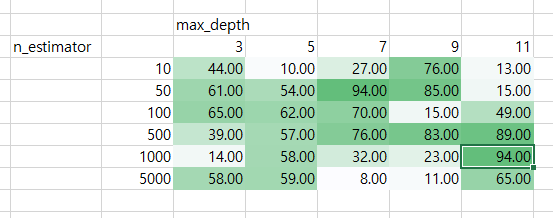

## Cross Validation
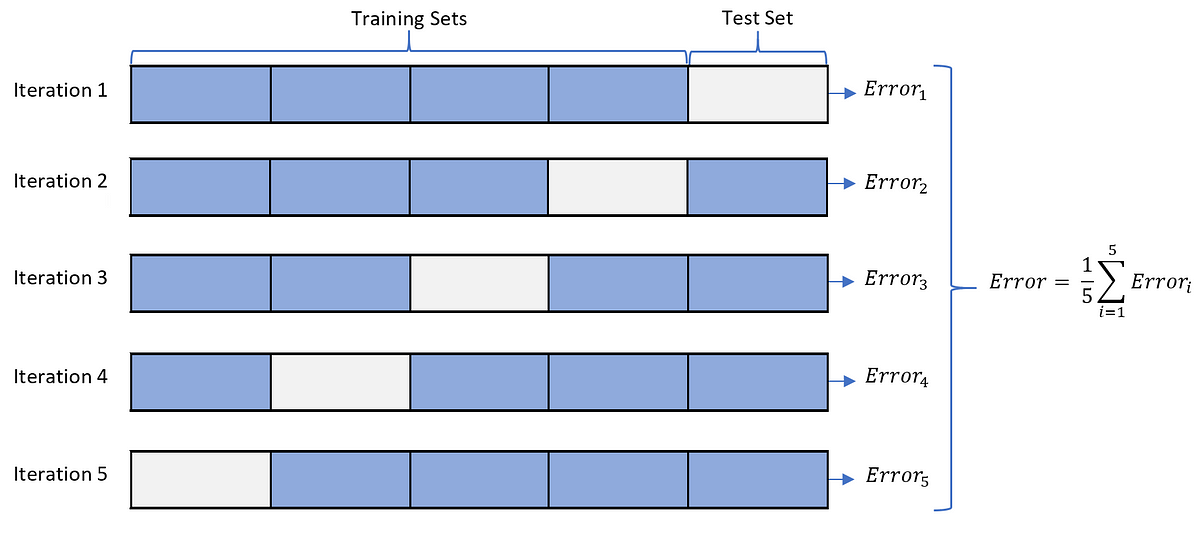

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(
    max_depth= 6,
    n_estimators = 2000
                             )
RFC.fit(X_train,y_train)

print("훈련 데이터 점수:", round(RFC.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(RFC.score(X_test, y_test), 3))

훈련 데이터 점수: 0.995
테스트 데이터 점수: 0.972


In [ ]:
from sklearn.model_selection import GridSearchCV
max_depth = range(3,15,2)

# max_depth : 5  * n_estimator : 5 * CV : 5 + refit : 1 = 126
param_grid = {'max_depth' : [3,5,7,9,11],
              'n_estimators' : [10,50,100,500,1000]
}

grid = GridSearchCV(RandomForestClassifier(random_state = 0),
                    param_grid,
                    refit = True,
                    verbose = 2,
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=3, n_e

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=5, random_state=0)


In [ ]:
grid.score(X_test, y_test)

0.972027972027972

# Linear Model
 - Linear Regression
    - Lasso
    - Ridge
 - Logistic Regression
 - Support Vector Machine

선형회귀분석 Assumption
- linearity : 데이터가 선형이다
- normality : 데이터가 정규분포를 띈다
- homoskedasticity : 등분산성
- no autocorrelation : 자기상관 없음
- no colinearity : 다중공선성 없음

coefficient :  64.93759793068894


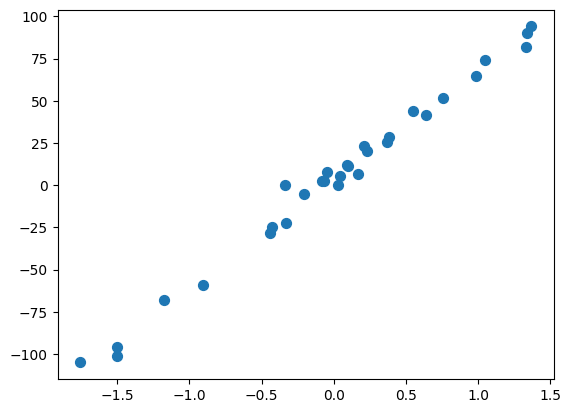

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
x, y, c = make_regression (n_samples = 30,
                           n_features = 1,
                           coef = True,

                           bias = 5,
                           noise = 5,

                           )

plt.scatter(x, y , s=50)
print("coefficient : ", c)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state = 0
)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.coef_)

In [ ]:
print(lr.score(X_test, y_test))
print(lr.coef_)

0.9950941733138672
[63.33211282]


y = ax + b + e

예측하고자하는 값 y =  특성 x * 특성x의 가중치(기울기:coefficient)  + 상수(b) + 잔차(e)

# 규제. Regulations
규제 : 대상에 대해서 억제성 성격을 띈다.

모델의 복잡성에 대한 규제 : overfitting 방지

**alpha **: 높일수록 규제가 강해짐 => 모델이 단순해짐.

1000만원. 100명

- L1 : '절대적' 규제 -> 가중치값이 낮은 변수들은 분석에서 고려되지 않는다.
    - 규제를 부담하는 사람의 수가 증가.
    - 개인이 부담하는 금액 감소
    - 인당 10만원. <- 소득이 10만 미만인 인구의 소득이 0원으로 수렴함.
    - 쓸데없는 변수가 많다고 판단될 때
    - 전문지식이 없는 분야에 대한 분석을 할 때.

- L2 : '상대적' 규제 : 가중치가 클 수록 더 큰 규제 적용.
    - 규제를 부담하는 사람의 수 감소
    - 소수의 개인의 많은 금액 부담.
    - 큰 가중치를 가지는 변수들의 가중치 값이 크게 줄어든다.
    - Robust <- Outlier 가 섞여있는 데이터.


- Linear Regression + L1 = Lasso reg.
- Linear Regression + L2 = Ridge reg.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score


y_pred = Lasso().fit(X_train, y_train).predict(X_test)

r2_score(y_pred, y_test)

0.9903932789001615

In [ ]:
from sklearn.linear_model import Ridge

y_pred = Ridge().fit(X_train, y_train).predict(X_test)

r2_score(y_pred, y_test)

0.9757547885304564

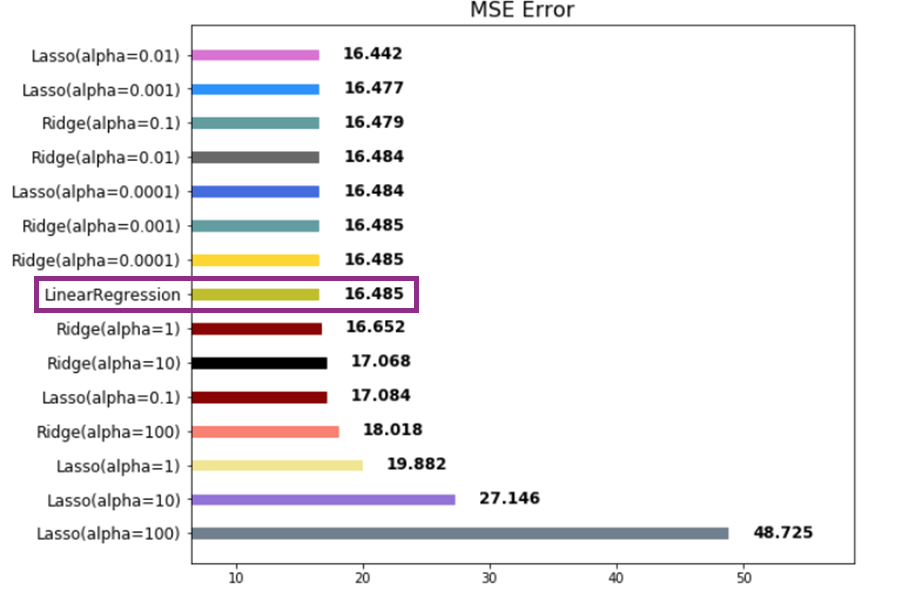

coefficient :  81.68613218791147


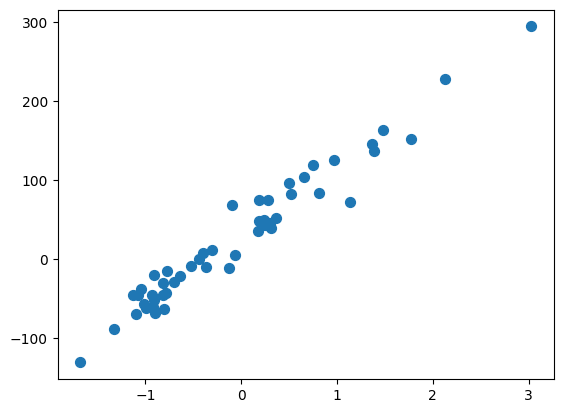

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
x, y, c = make_regression (n_samples = 50,
                           n_features = 1,
                           coef = True,

                           bias = 30,
                           noise = 20,

                           )

plt.scatter(x, y , s=50)
print("coefficient : ", c)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state = 0
)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.coef_)

0.97886037963126
[81.94730654]


In [ ]:
lr.predict([[1.5]])

array([153.42006472])

y = ax + b

coefficient :  81.68613218791147


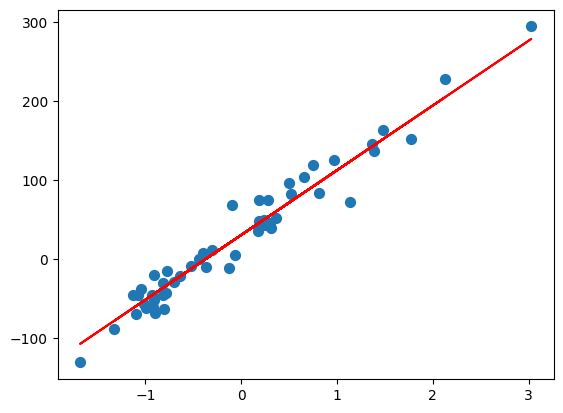

In [ ]:
regression_line = [lr.coef_ * i + lr.intercept_ for i in x]

plt.scatter(x, y , s=50)
plt.plot(x, regression_line, color = 'red' )
print("coefficient : ", c)


In [ ]:
import numpy as np

N = 1000
X = np.random.random((N, 2)) * 6 - 3

Y = np.cos(2*X[:,0]) + np.cos(2*X[:,1])

$$ y = \cos(2x_1) + cos(3x_2) $$

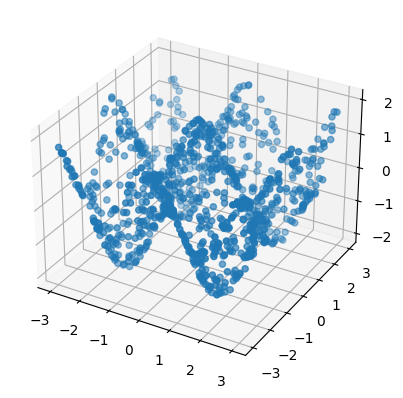

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(0.01)

model.compile(optimizer=opt, loss = 'mse')

r = model.fit(X,Y, epochs = 100)

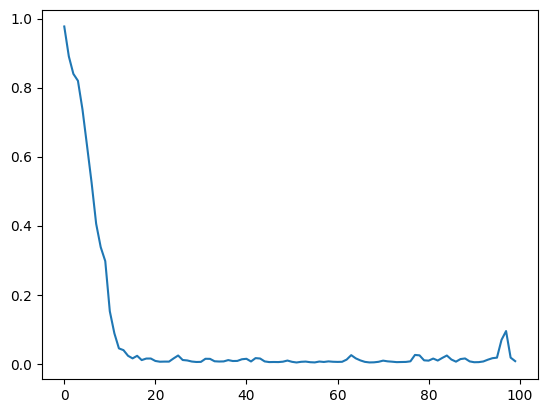

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label = 'loss')

In [ ]:
y_pred = model.predict(X)
r2 = r2_score(Y, y_pred)
print("R2 Score : ", r2)

32/32 [==============================] - 1s 5ms/step
R2 Score :  0.995114560684791


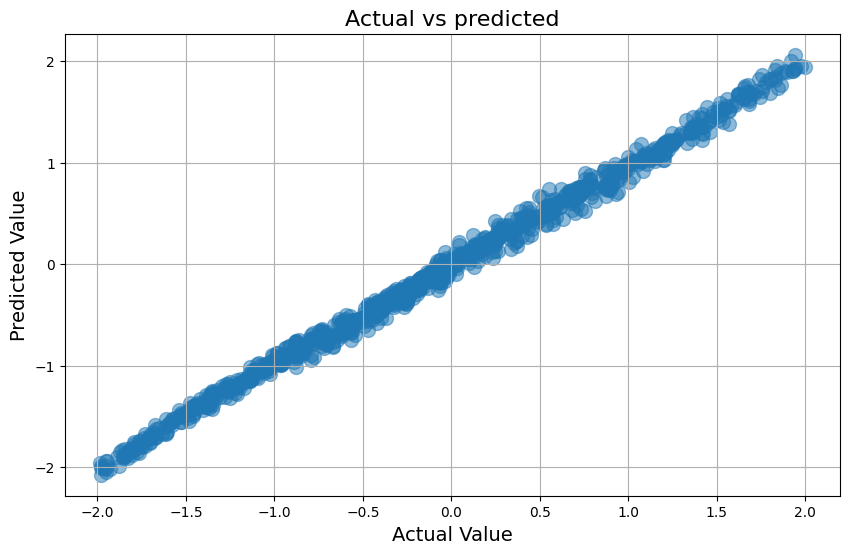

In [ ]:
plt.figure(figsize= (10,6))

plt.scatter(Y, y_pred, alpha = 0.5, s = 100)

plt.xlabel('Actual Value', fontsize = 14)
plt.ylabel('Predicted Value', fontsize = 14)
plt.title('Actual vs predicted', fontsize = 16)

plt.grid(True)

plt.show()

79/79 [==============================] - 0s 2ms/step


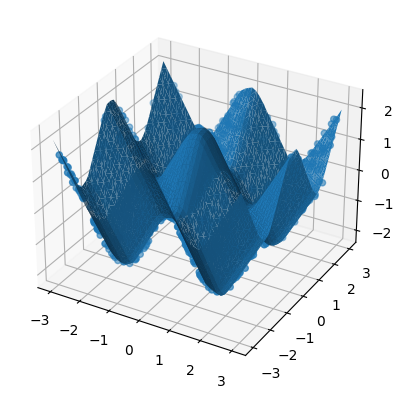

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

Yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased= True)
plt.show()

# Extrapolation (외삽)



79/79 [==============================] - 0s 4ms/step


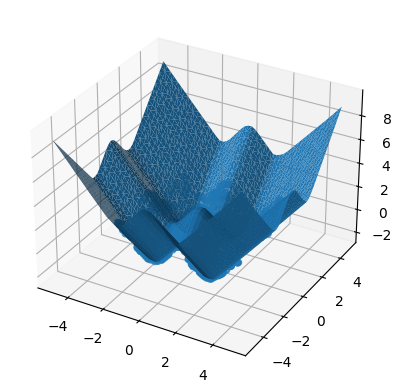

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-5,5,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

Yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased= True)
plt.show()


coefficient :  42.38550485581797


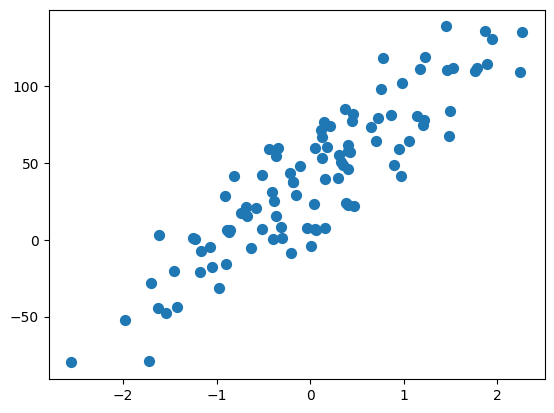

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
x, y, c = make_regression (n_samples = 100,
                           n_features = 1,
                           coef = True,

                           bias = 40,
                           noise = 20,
                           random_state=0

                           )

plt.scatter(x, y , s=50)
print("coefficient : ", c)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state = 0
)

In [ ]:
from sklearn.linear_model import Lasso

y_pred = Lasso().fit(X_train, y_train).predict(X_test)

r2_score(y_pred, y_test)

0.7374517823527825

In [ ]:
from sklearn.linear_model import Ridge

y_pred = Ridge().fit(X_train, y_train).predict(X_test)

r2_score(y_pred, y_test)

0.73941443163381

In [ ]:
alphas = np.arange(start=1, stop=1000, step=10)/100
alphas

array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
       2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
       3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
       5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
       6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
       7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
       8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
       9.91])

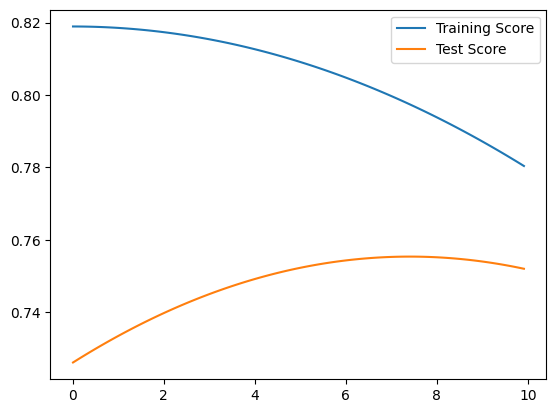

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

#결과 점수를 저장할 리스트를 선언한다
train_accuracy = []
test_accuracy = []

#알파의 값을 0에서 10까지, 0.1씩 증가하면서 만들어 준다
alphas = np.arange(start=1, stop=1000, step=10)/100

#For loop 을 이용하여 앞서 생성한 알파값을 하나씩 적용해본다
#이때 하나씩 적용한 알파값의 결과는 각자 선언한 리스트에 저장한다
for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    train_accuracy.append(lasso.score(X_train, y_train))
    test_accuracy.append(lasso.score(X_test, y_test))


#분석결과를 시각화 해 본다
plt.plot(alphas, train_accuracy, label="Training Score")
plt.plot(alphas, test_accuracy, label="Test Score")
plt.legend()
plt.show()

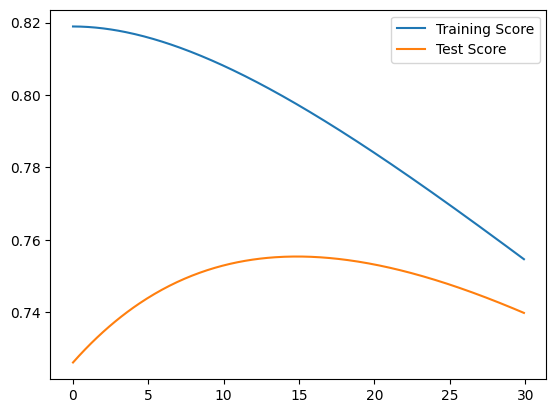

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

#결과 점수를 저장할 리스트를 선언한다
train_accuracy = []
test_accuracy = []

#알파의 값을 0에서 10까지, 0.1씩 증가하면서 만들어 준다
alphas = np.arange(start=1, stop=3000, step=10)/100

#For loop 을 이용하여 앞서 생성한 알파값을 하나씩 적용해본다
#이때 하나씩 적용한 알파값의 결과는 각자 선언한 리스트에 저장한다
for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    train_accuracy.append(ridge.score(X_train, y_train))
    test_accuracy.append(ridge.score(X_test, y_test))


#분석결과를 시각화 해 본다
plt.plot(alphas, train_accuracy, label="Training Score")
plt.plot(alphas, test_accuracy, label="Test Score")
plt.legend()
plt.show()

# Logistic Regression 로짓 회귀
이름 : 회귀, but, 분류기 -> 2진분류기, but 다중분류 성능이 탁월하다.

0,1 분류 문제를. 오즈비(exponential)를 Logit 변환해서 regression 해서 나온 결과: 0,1일 확률에 기반해서 0/1을 분류(이진분류)

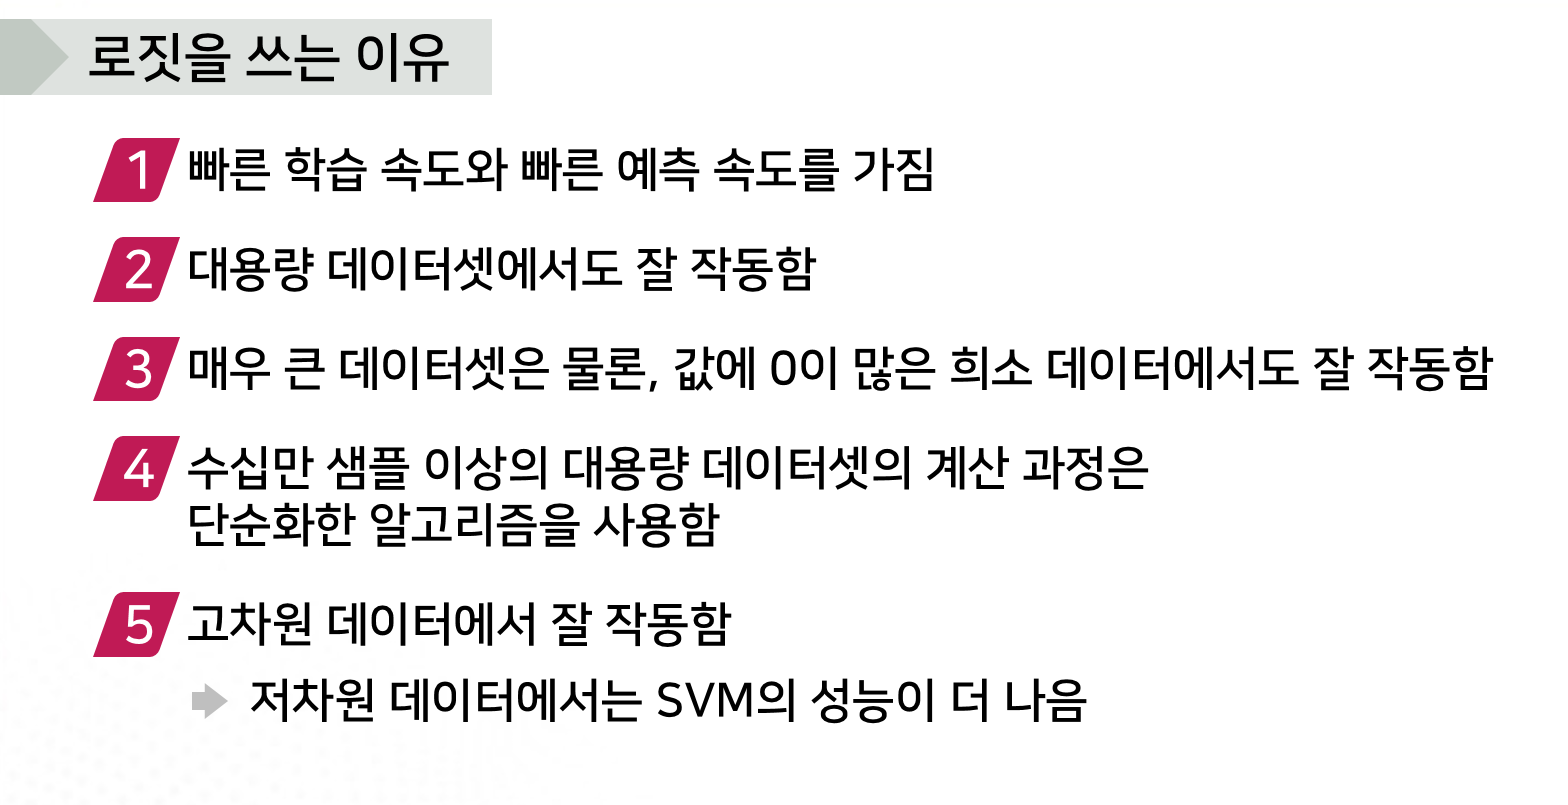

다중분류 vs 이진분류

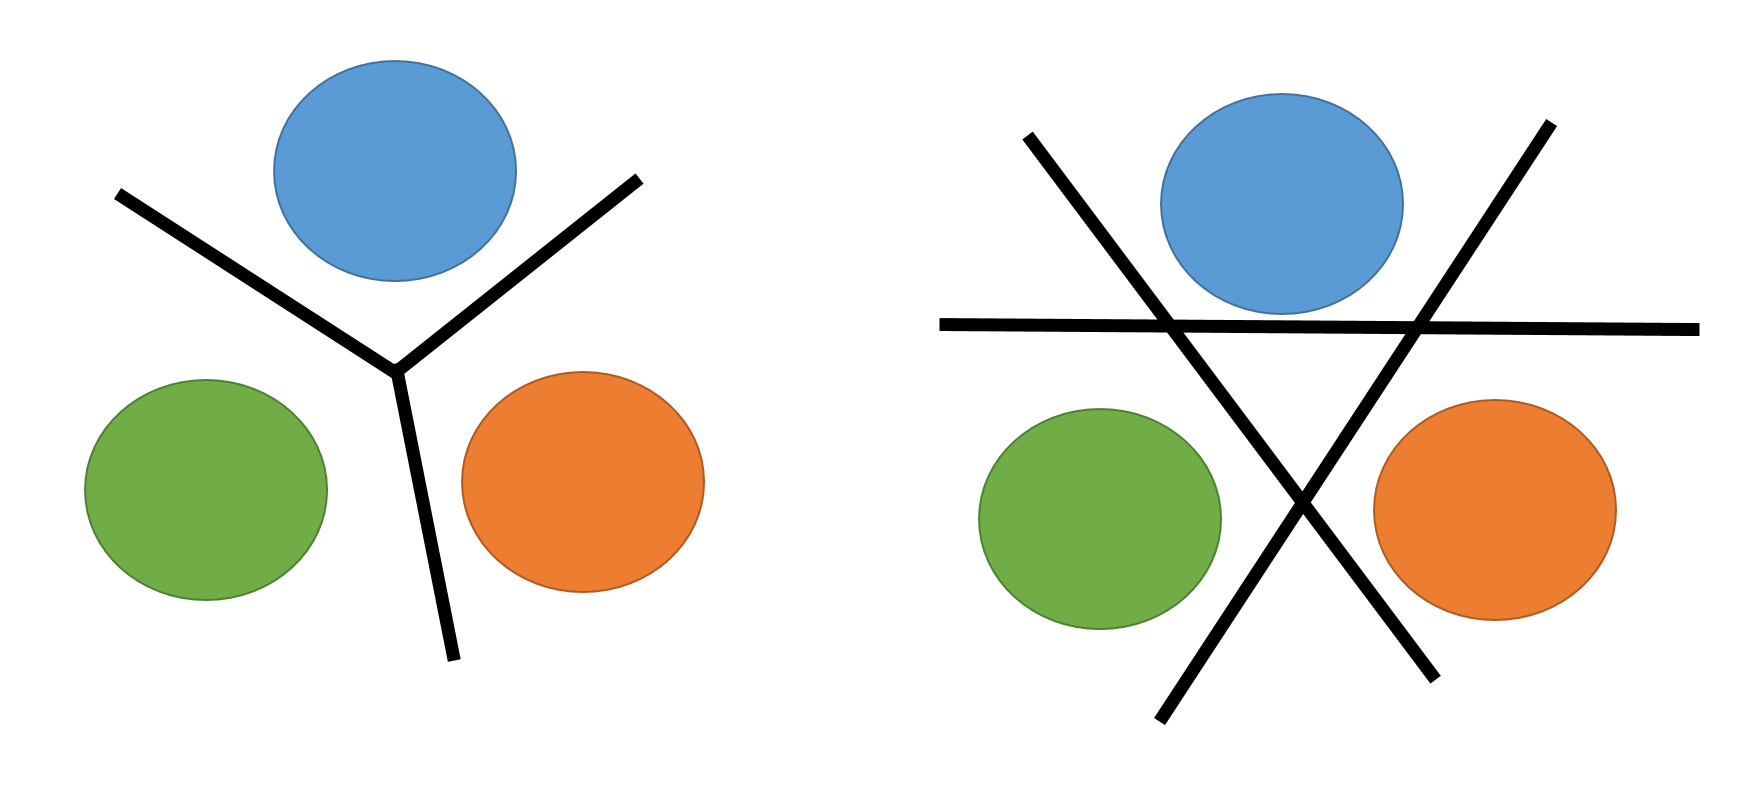

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%cd /content/drive/MyDrive/강의자료/인공지능2급/금오공대_230802/실습용자료


df = pd.read_csv('breast_cancer.csv')
df.info()

/content/drive/MyDrive/강의자료/인공지능2급/금오공대_230802/실습용자료
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              569 non-null    int64
 1   uniformity_of_cell_size      569 non-null    int64
 2   uniformity_of_cell_shape     569 non-null    int64
 3   marginal_adhesion            569 non-null    int64
 4   single_epithelial_cell_size  569 non-null    int64
 5   bare_nuclei                  569 non-null    int64
 6   bland_chromatin              569 non-null    int64
 7   normal_nucleoli              569 non-null    int64
 8   mitosis                      569 non-null    int64
 9   class                        569 non-null    int64
dtypes: int64(10)
memory usage: 44.6 KB


In [ ]:
X = df.iloc[: , :9]
y = df.iloc[: , 9]
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: class
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0,
                                                    stratify = y,
)

stratify : 데이터를 split 할 때, original data의 class비율을 유지하면서 복원추출한다.

In [ ]:
print(y.value_counts().iloc[0] / y.value_counts().iloc[1])
print(y_train.value_counts().iloc[0] / y_train.value_counts().iloc[1])
print(y_test.value_counts().iloc[0] / y_test.value_counts().iloc[1])

1.7355769230769231
1.7307692307692308
1.75


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 500).fit(X_train, y_train)

print("Train Data score : ", round(logreg.score(X_train,y_train),3))
print("Test Data score: ", round(logreg.score(X_test, y_test),3))

Train Data score :  0.96
Test Data score:  0.958


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000, C=400).fit(X_train, y_train)

print("Train Data score : ", round(logreg.score(X_train,y_train),3))
print("Test Data score: ", round(logreg.score(X_test, y_test),3))

Train Data score :  0.96
Test Data score:  0.951


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000, C=400, solver='liblinear', penalty='l1').fit(X_train, y_train)

print("Train Data score : ", round(logreg.score(X_train,y_train),3))
print("Test Data score: ", round(logreg.score(X_test, y_test),3))

Train Data score :  0.96
Test Data score:  0.958


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000, C=400, penalty = 'none').fit(X_train, y_train)

print("Train Data score : ", round(logreg.score(X_train,y_train),3))
print("Test Data score: ", round(logreg.score(X_test, y_test),3))

Train Data score :  0.96
Test Data score:  0.958


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


# Categorical Data

In [ ]:
df = pd.read_csv('adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   education        32561 non-null  object
 3   educationNumber  32561 non-null  int64 
 4   maritalStatus    32561 non-null  object
 5   occupation       32561 non-null  object
 6   relationship     32561 non-null  object
 7   race             32561 non-null  object
 8   gender           32561 non-null  object
 9   hourPerWeek      32561 non-null  int64 
 10  nativeCountry    32561 non-null  object
 11  income           32561 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [ ]:
df

,age,workclass,education,educationNumber,maritalStatus,occupation,relationship,race,gender,hourPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [ ]:
X = df.loc[:,['age', 'educationNumber', 'hourPerWeek'  ]]
y = df.loc[:, 'income']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0,
                                                    stratify = y,
)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 500).fit(X_train, y_train)

print("Train Data score : ", round(logreg.score(X_train,y_train),3))
print("Test Data score: ", round(logreg.score(X_test, y_test),3))

Train Data score :  0.789
Test Data score:  0.79


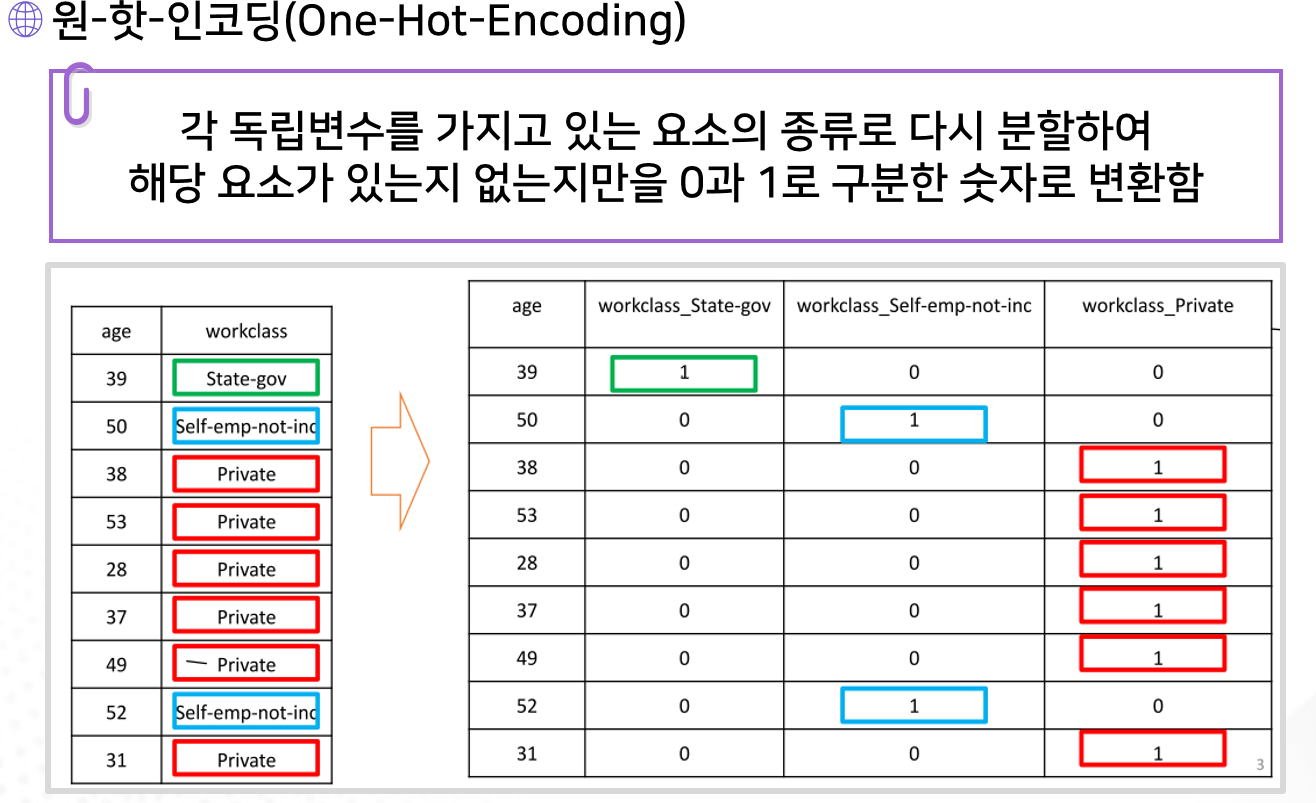

In [ ]:
df['workclass'].nunique()

9

In [ ]:
ohe_sample = pd.get_dummies(df['workclass'])
ohe_sample

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0
32557,0,0,0,0,1,0,0,0,0
32558,0,0,0,0,1,0,0,0,0
32559,0,0,0,0,1,0,0,0,0


In [ ]:
X.shape

(32561, 3)

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'educationNumber', 'maritalStatus',
       'occupation', 'relationship', 'race', 'gender', 'hourPerWeek',
       'nativeCountry', 'income'],
      dtype='object')

In [ ]:
X = df.loc[:,'age': 'nativeCountry']
y = df.loc[:, 'income']


In [ ]:
X = pd.get_dummies(X)
X.shape

(32561, 105)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

# 학습결과 출력
print()
print("훈련점수:", logreg.score(X_train, y_train))
print("테스트 점수:", logreg.score(X_test, y_test))


훈련점수: 0.8384111384111385
테스트 점수: 0.8329443557302543


In [ ]:
newdata = pd.read_csv('adult_test.csv')
newdata

,age,workclass,education,educationNumber,maritalStatus,occupation,relationship,race,gender,hourPerWeek,nativeCountry,income
0,37,Private,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,40,United-States,<=50K
1,43,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,<=50K
2,32,Private,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,40,United-States,<=50K
3,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
4,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,>50K


In [ ]:
newdata.shape

(5, 12)

In [ ]:
X_new = newdata.loc[:,'age': 'nativeCountry']
y_new = newdata.loc[:, 'income']

# X_new = pd.get_dummies(X_new)

print("New data", X_new.shape)
print("train data", X.shape)

New data (5, 11)
train data (32561, 105)


In [ ]:
newdata['workclass'].nunique()

3

In [ ]:
# 새 데이터 + 기존데이터
# one hot encoding
# 새 데이터 - 기존데이터
# 새 데이터 예측

In [ ]:
X = df.iloc[:, :11]
X.shape

(32561, 11)

In [ ]:
# 새 데이터 + 기존데이터
data_appended = X_new.append(X)
data_appended.shape

# one hot encoding
data_appended = pd.get_dummies(data_appended)
data_appended.shape

# 새 데이터 - 기존데이터
new_data_X = data_appended.iloc[:5, :]
new_data_X
# 새 데이터 예측

<ipython-input-60-c82576315fc4>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_appended = X_new.append(X)


,age,educationNumber,hourPerWeek,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,nativeCountry_ Portugal,nativeCountry_ Puerto-Rico,nativeCountry_ Scotland,nativeCountry_ South,nativeCountry_ Taiwan,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia
0,37,12,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,43,10,50,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,32,6,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,12,38,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,52,9,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
logreg.predict(new_data_X) == y_new

0     True
1     True
2     True
3    False
4     True
Name: income, dtype: bool

# 연속형 데이터의 범주화

In [ ]:
#연령 범주화
# pd.cut() 함수를 사용해서 연령을 나누는 기준을 설정해 준다
# bin = 나이를 나누는 기준
# label 범주화 한 범주의 이름
X["age_cut"] = pd.cut(X.age,
                      bins=[20,30,40,50,60,80],
                      labels=['20s','30s','40s','50s','60s'])
print(X["age_cut"])
X = pd.get_dummies(X)
print(X.shape)

#교육 햇수 범주화
X["edu_cut"] = pd.cut(X.educationNumber,
                      bins=[4,8,10,12,15,20],
                      labels=['elem','high','uni','ma','Phd'])
print(X["edu_cut"])

X = pd.get_dummies(X)
print(X.shape)

0        30s
1        40s
2        30s
3        50s
4        20s
        ... 
32556    20s
32557    30s
32558    50s
32559    20s
32560    50s
Name: age_cut, Length: 32561, dtype: category
Categories (5, object): ['20s' < '30s' < '40s' < '50s' < '60s']
(32561, 110)
0          ma
1          ma
2        high
3        elem
4          ma
         ... 
32556     uni
32557    high
32558    high
32559    high
32560    high
Name: edu_cut, Length: 32561, dtype: category
Categories (5, object): ['elem' < 'high' < 'uni' < 'ma' < 'Phd']
(32561, 115)


In [ ]:
pd.cut(X.age,
                      bins=[20,30,40,50,60,80],
                      labels=['20s','30s','40s','50s','60s'])

0        30
1        40
2        30
3        50
4        20
         ..
32556    20
32557    30
32558    50
32559    20
32560    50
Name: age, Length: 32561, dtype: category
Categories (5, int64): [20 < 30 < 40 < 50 < 60]

# 비지도 학습

## Data Scaling
- Normalize : 특정범위(0~1) 에 맞게 데이터 재 배치
- Standardize : 데이터 중심을 0점에 맞춘다.

In [ ]:
df = pd.read_csv('cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X = df.iloc[:, :30]
y = df.iloc[:, 30]

# train_test_split 기본적으로 train 3 : test 1 비율로 나누어 준다.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y
)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)

print("훈련 데이터 점수:", round(svc.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(svc.score(X_test, y_test), 3))

훈련 데이터 점수: 0.913
테스트 데이터 점수: 0.909


Text(50.722222222222214, 0.5, 'True')

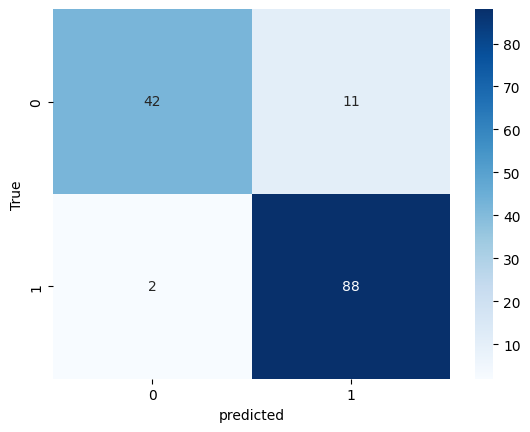

In [ ]:
from sklearn.metrics import confusion_matrix

y_prediction = svc.predict(X_test)
cm = confusion_matrix(y_test,y_prediction )
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(cm, cmap="Blues", annot=True)
plt.xlabel("predicted")
plt.ylabel("True")

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# X_train 로 학습.
scaler = StandardScaler()
scaler.fit(X_train)


# X_train , X_test 둘 다 변환
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC()
svc.fit(X_train_scaled,y_train)

print("훈련 데이터 점수:", round(svc.score(X_train_scaled, y_train), 3))
print("테스트 데이터 점수:", round(svc.score(X_test_scaled, y_test), 3))


훈련 데이터 점수: 0.988
테스트 데이터 점수: 0.979


Text(50.722222222222214, 0.5, 'True')

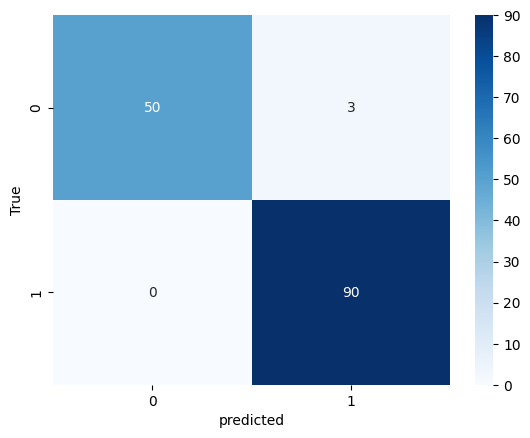

In [ ]:
from sklearn.metrics import confusion_matrix

y_prediction = svc.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_prediction )
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(cm, cmap="Blues", annot=True)
plt.xlabel("predicted")
plt.ylabel("True")

## 군집분석
- 거리 기반: K-mean
- 밀도 기반: DBSCAN (Density Based Spatial Cluster Applications with Noise)

In [ ]:
dataset = pd.read_csv("blob.csv", header=None)
print(dataset.head())
dataset.info()

        0     1    2
0  0.9210 -9.98  0.0
1 -5.2700 -9.62  0.0
2 -0.4530 -6.04  0.0
3 -0.0856 -2.17  1.0
4  1.5300 -0.36  1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [ ]:
X = dataset.iloc[:,0:2]
y = dataset.iloc[:,2]

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
#n_clusters = 2 (기본값)
kmeans.fit(X)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int32)

In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.2 MB/s eta 0:00:00


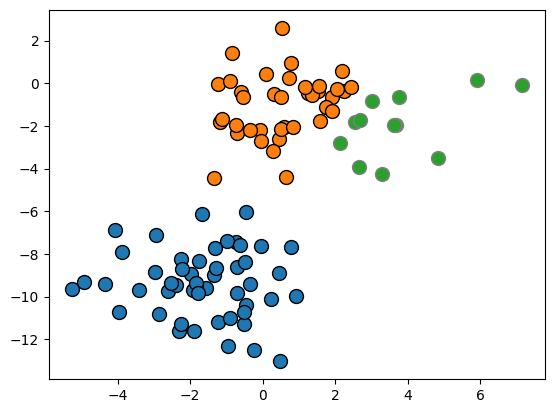

In [ ]:
import mglearn
mglearn.discrete_scatter(x1=X[0], x2=X[1], y=kmeans.labels_, markers='o')

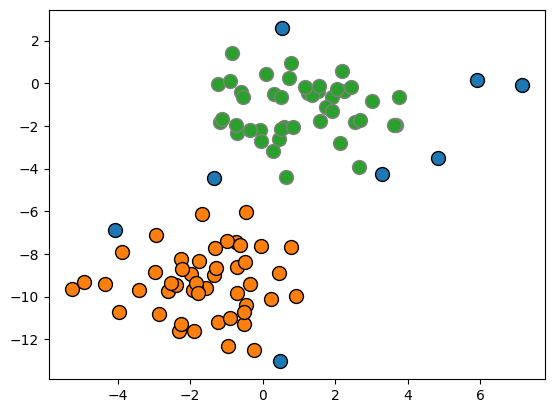

In [ ]:
from sklearn.cluster import DBSCAN
DB= DBSCAN(min_samples=5, eps=1.5)
#min_sample을 줄이면 군집수가 왜 늘어날까?
#eps를 늘리면 클러스터가 왜 커질까?
DB.fit(X)
DB.labels_

mglearn.discrete_scatter(x1=X[0], x2=X[1], y=DB.labels_, markers='o')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

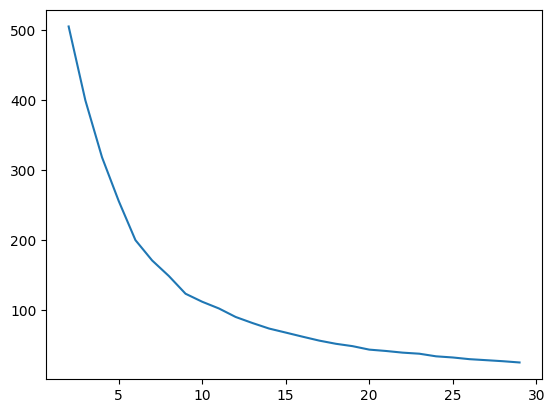

In [ ]:
inertia = []
for i in range(2,30):
    km = KMeans(n_clusters = i)
    km.fit(X)
    inertia.append(km.inertia_)
    #ARI

plt.plot(range(2,30), inertia)
plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


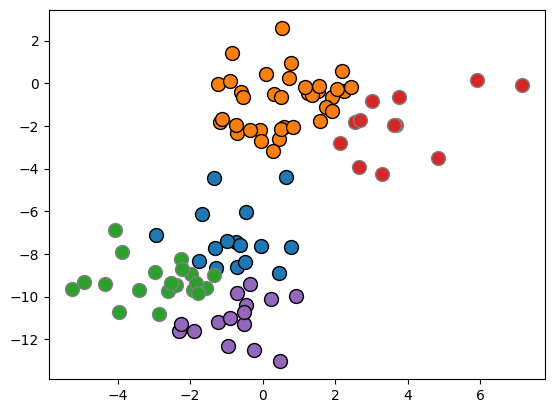

In [ ]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(X)
kmeans.labels_

mglearn.discrete_scatter(x1=X[0], x2=X[1], y=kmeans.labels_, markers='o')

## 군집분석 평가
- SI : 라벨이 없을때
- ARI : 라벨이 있을때

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


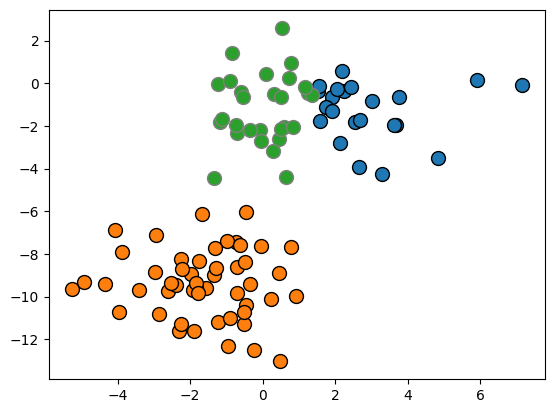

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
#n_clusters = 2 default
kmeans.fit(X)
kmeans.labels_

mglearn.discrete_scatter(x1=X[0], x2=X[1], y=kmeans.labels_, markers='o')

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
print("k-means ARI", adjusted_rand_score(y, kmeans.labels_))

from sklearn.metrics.cluster import silhouette_score
print("k-means SI",silhouette_score(X, kmeans.labels_))

k-means ARI 0.7504582951420715
k-means SI 0.49705978941112183


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
#n_clusters = 2 default
kmeans.fit(X)
kmeans.labels_

from sklearn.metrics.cluster import adjusted_rand_score
print("k-means ARI", adjusted_rand_score(y, kmeans.labels_))

from sklearn.metrics.cluster import silhouette_score
print("k-means SI",silhouette_score(X, kmeans.labels_))

k-means ARI 0.4609299023811771
k-means SI 0.37766947625748815


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import DBSCAN
DB= DBSCAN(min_samples=5, eps=1)
#min_sample을 줄이면 군집수가 왜 늘어날까?
#eps를 늘리면 클러스터가 왜 커질까?
DB.fit(X)
DB.labels_

print("DBSCAN ARI",adjusted_rand_score(y, DB.labels_) )
print("DBSCAN SI",silhouette_score(X, DB.labels_))


DBSCAN ARI 0.5593622170083654
DBSCAN SI 0.38449979264730105


DBSCAN ARI 0.8932073744769874
DBSCAN SI 0.5480906814459999


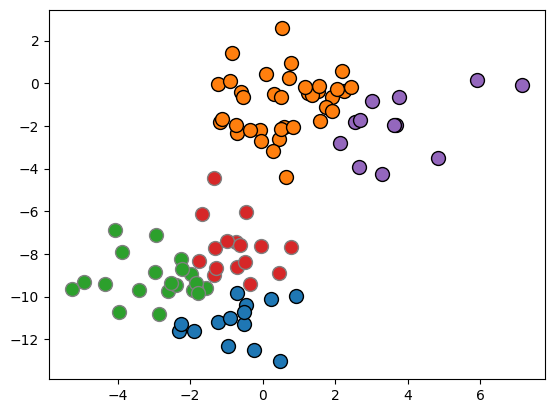

In [ ]:
from sklearn.cluster import DBSCAN
DB= DBSCAN(min_samples=4, eps=1.5)
#min_sample을 줄이면 군집수가 왜 늘어날까?
#eps를 늘리면 클러스터가 왜 커질까?
DB.fit(X)
DB.labels_

print("DBSCAN ARI",adjusted_rand_score(y, DB.labels_) )
print("DBSCAN SI",silhouette_score(X, DB.labels_))

mglearn.discrete_scatter(x1=X[0], x2=X[1], y=kmeans.labels_, markers='o')